In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from datetime import datetime 

In [3]:
df = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\No_show\df_clean.csv')

In [4]:
df.head(1)

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointmentDay,scheduledDay,Interval,Period
0,0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0,Afternoon


In [5]:
df.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Interval
count,110526.000000,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,55262.596756,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,9.532915
std,31906.403636,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.027724
min,0.000000,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.250000,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55262.500000,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,82893.750000,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,110526.000000,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [15]:
df=df.drop(['Unnamed: 0'], axis=1)
df=df.set_index(['PatientId', 'AppointmentID'])
df.head(1)

,,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointmentDay,scheduledDay,Interval,Period
PatientId,AppointmentID,,,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0,Afternoon


## Are any values in a feature disproportionately represented in no shows?

In [18]:
pd.crosstab(df['scheduledDay'], df['No-show'] )

No-show,No,Yes
scheduledDay,,
Friday,15028,3887
Monday,18523,4561
Saturday,23,1
Thursday,14373,3700
Tuesday,20877,5291
Wednesday,19383,4879


In [26]:
round(pd.crosstab(df['scheduledDay'], df['No-show'], normalize='index')*100,2)

No-show,No,Yes
scheduledDay,,
Friday,79.45,20.55
Monday,80.24,19.76
Saturday,95.83,4.17
Thursday,79.53,20.47
Tuesday,79.78,20.22
Wednesday,79.89,20.11


### Saturday is the higest % of attended visits, but there was only 24 visits on that day over the time frame. Friday comes out slightly on top for highest % of no shows. Tuesday had the most scheduled appointments and Thursday and Friday (the end of the week) have th least amount of schedueld visits.

In [33]:
neighbourhood=pd.crosstab(df['Neighbourhood'], df['No-show'] )

In [42]:
neighbourhood_pct=round(pd.crosstab(df['Neighbourhood'], df['No-show'], normalize='index')*100,2)

In [43]:
neighbourhood_pct.sort_values(by=['Yes'], inplace=True)

In [44]:
neighbourhood_pct.head(81)

No-show,No,Yes
Neighbourhood,,
PARQUE INDUSTRIAL,100.00,0.00
ILHA DO BOI,91.43,8.57
AEROPORTO,87.50,12.50
MÁRIO CYPRESTE,85.44,14.56
SOLON BORGES,85.29,14.71
...,...,...
ITARARÉ,73.73,26.27
SANTA CLARA,73.52,26.48
SANTA CECÍLIA,72.54,27.46


### Let's look to see how many totoal visits make up the extremes in our % breakdown. We'll do loc list search search by creating lists out of the top/bottom 5 Neighbourhoods.

In [49]:
neighbourhood.loc[['PARQUE INDUSTRIAL',
'ILHA DO BOI',
'AEROPORTO',
'MÁRIO CYPRESTE',
'SOLON BORGES']]

No-show,No,Yes
Neighbourhood,,
PARQUE INDUSTRIAL,1,0
ILHA DO BOI,32,3
AEROPORTO,7,1
MÁRIO CYPRESTE,317,54
SOLON BORGES,400,69


In [52]:
neighbourhood.loc[['ITARARÉ',
'SANTA CLARA',
'SANTA CECÍLIA',
'SANTOS DUMONT',
'ILHAS OCEÂNICAS DE TRINDADE']]

No-show,No,Yes
Neighbourhood,,
ITARARÉ,2591,923
SANTA CLARA,372,134
SANTA CECÍLIA,325,123
SANTOS DUMONT,907,369
ILHAS OCEÂNICAS DE TRINDADE,0,2


### Our top 3 best-attended and worst-attented %-wise are outliers in terms of total number of scheduled visits.  

In [53]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [60]:
len(df.loc[df['No-show'] == 'Yes'])/len(df)*100

20.193438647919944

### Approximately 20% of all scheduled visits resulted in a no show 

## Gender & No-shows 

In [62]:
df.Gender.unique ()

array(['F', 'M'], dtype=object)

In [63]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

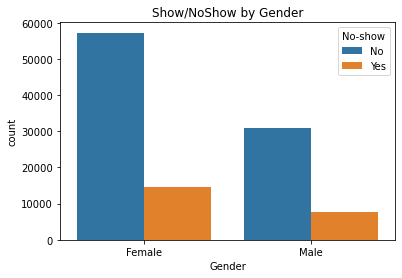

In [66]:
ax = sns.countplot(x=df.Gender, hue=df['No-show'], data=df)
ax.set_title("Show/NoShow by Gender")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [68]:
len(df.loc[(df['No-show'] == 'Yes') & (df['Gender'] == "F")])/len(df.loc[(df['No-show'] == 'Yes')])

0.653882342398853

### Woman comprise approx. 65% of those who no-showed and they make up about 65% of the total scheduled visits. It appears that gender plays no measurable role in no-shows. 

## Age and No-shows

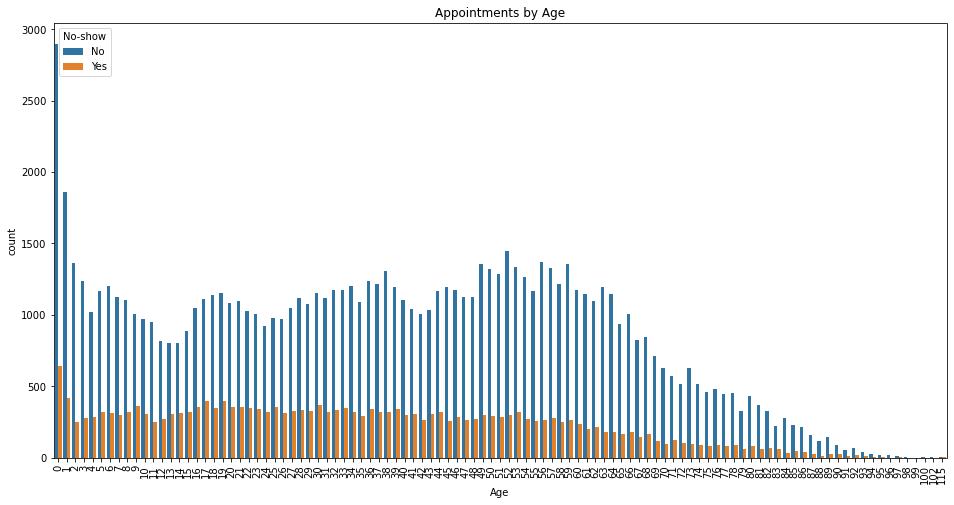

In [71]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Age'], hue=df['No-show'])
ax.set_title("Appointments by Age")
plt.show()

In [73]:
len(df.loc[(df['Age'] <= 1)])

5812

### There are an extremely high amount of visits for age 0 and a lot for age 1. 0 could be an entry for when they don't know the age thus innacurately pumping up that value's count. But the liklihood of that possibility seems diminished when you take unto account that there are a very high amout of 1s, the value immediately above 0. Presumptively, it would make sense that these two age groups predominate Age count becuase young children often visit doctors more often than most age ranges until late life.

## Scholarships & No-shows 

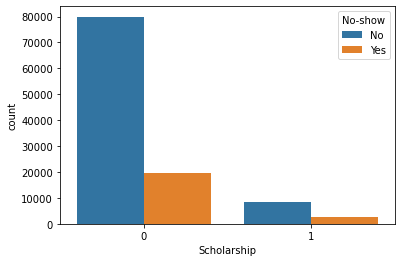

In [77]:
x = sns.countplot(x=df['Scholarship'], hue=df['No-show'], data=df)
ax.set_title("Scholarship")

plt.show()

In [85]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Scholarship'] == 1)])/len(df.loc[(df['Scholarship'] == 1)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Scholarship'] == 0)])/len(df.loc[(df['Scholarship'] == 0)]))

0.2373630420771568
0.19807354638037425


### Those with scholarships were more likely to no-show than those without.

## Hypertension & no-shows 

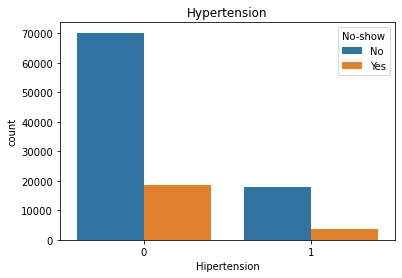

In [87]:
ax = sns.countplot(x=df['Hipertension'], hue=df['No-show'], data=df)
ax.set_title("Hypertension")
plt.show()

In [94]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Hipertension'] == 1)])/len(df.loc[(df['Hipertension'] == 1)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Hipertension'] == 0)])/len(df.loc[(df['Hipertension'] == 0)]))

0.17301958625751113
0.2090391659622429


### Those with hypertension were not more likely to no-show than those who did not.  

## Diabetes & No-show

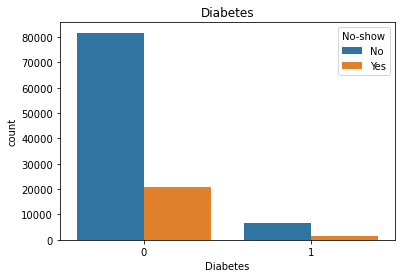

In [89]:
ax = sns.countplot(x=df['Diabetes'], hue=df['No-show'], data=df)
ax.set_title("Diabetes")
plt.show()

In [90]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Diabetes'] == 1)])/len(df.loc[(df['Diabetes'] == 1)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Diabetes'] == 0)])/len(df.loc[(df['Diabetes'] == 0)]))

0.18003273322422259
0.20363023112991432


### Those with diabetes were about 2 percentage more likely to not no-show. 

## Alcoholism & No-show 

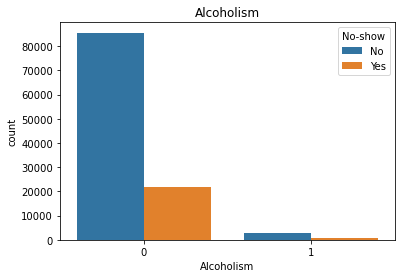

In [95]:
ax = sns.countplot(x=df['Alcoholism'], hue=df['No-show'], data=df)
ax.set_title("Alcoholism")
plt.show()

In [96]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Alcoholism'] == 1)])/len(df.loc[(df['Alcoholism'] == 1)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Alcoholism'] == 0)])/len(df.loc[(df['Alcoholism'] == 0)]))

0.20148809523809524
0.20194837915010358


### Almost no difference between Alcoholism and no-shows.

## Handicaps & No-shows 

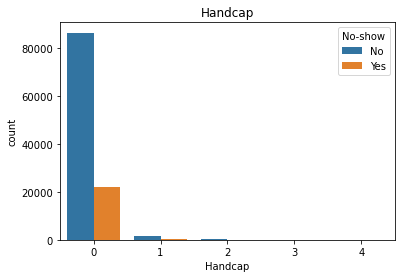

In [97]:
ax = sns.countplot(x=df['Handcap'], hue=df['No-show'], data=df)
ax.set_title("Handcap")
plt.show()

In [99]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Handcap'] != 0)])/len(df.loc[(df['Handcap'] != 0)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['Handcap'] == 0)])/len(df.loc[(df['Handcap'] == 0)]))

0.18161535029004908
0.20235489680011082


### People that have at least one handicap are about 2% more likely to not no-show.

## SMS & No-shows

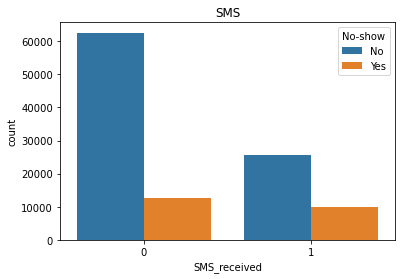

In [101]:
ax = sns.countplot(x=df['SMS_received'], hue=df['No-show'], data=df)
ax.set_title("SMS")
plt.show()

In [102]:
print(len(df.loc[(df['No-show'] == 'Yes') & (df['SMS_received'] == 1)])/len(df.loc[(df['SMS_received'] == 1)]))
print(len(df.loc[(df['No-show'] == 'Yes') & (df['SMS_received'] == 0)])/len(df.loc[(df['SMS_received'] == 0)]))

0.27574544839637
0.16703533926762965


### Those who receieved an SMS were far more likely to not no-show. 

In [111]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [112]:
interval_count = pd.crosstab(df.Interval, df['No-show'])
### print(len(interval_count))=128
print_full(interval_count)

No-show      No   Yes
Interval             
0         40870  2905
1          5123  1606
2          2093   644
3          4059  1231
4          2405   872
5          3036  1001
6          3597  1310
7          1662   670
8          1165   440
9           951   440
10          675   312
11          762   353
12         1146   536
13         2000   913
14         1001   502
15          800   351
16          757   350
17          709   312
18          681   363
19          779   408
20         1286   575
21          769   404
22          546   276
23          387   235
24          381   256
25          468   263
26          693   320
27         1203   503
28          733   356
29          517   187
30          452   220
31          380   206
32          442   222
33          538   270
34          604   359
35          380   171
36          212   119
37          131    68
38          115    55
39          151   103
40          221   121
41          263   154
42          178    76
43        

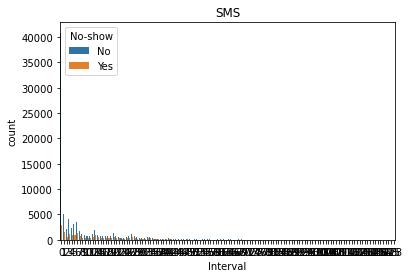

In [103]:
ax = sns.countplot(x=df['Interval'], hue=df['No-show'], data=df)
ax.set_title("SMS")
plt.show()

### There are a lot of inteval values. May want to think about sgementing thse into blocks. 